# **LIVER DISEASE DATASET ANALYSIS**


# **1. Importing Modules**
  


In [ ]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.optimizers import Adam
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import make_pipeline
from collections import Counter
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# **2. Loading the dataset and Inital inspection**

In [605]:
#File path to dataset
file_path = "C:/Users/diasr/OneDrive - University of Reading/3rd Year/AI and ML/Coursework/Liver Data/Liver Patient Dataset.xlsx"

#Loading the dataset and displaying the first five rows
data = pd.read_excel(file_path)
data.head()


,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0


## 2.1 Dataframe Dimension

In [606]:
#Gives the dimension of the dataset
data.shape

(32801, 11)

## 2.2 Data Info

In [607]:
# Understanding data types and other information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32801 entries, 0 to 32800
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    32799 non-null  float64
 1   Gender of the patient                 31899 non-null  object 
 2   Total Bilirubin                       32153 non-null  float64
 3   Direct Bilirubin                      32240 non-null  float64
 4    Alkphos Alkaline Phosphotase         32005 non-null  float64
 5    Sgpt Alamine Aminotransferase        32263 non-null  float64
 6   Sgot Aspartate Aminotransferase       32339 non-null  float64
 7   Total Protiens                        32338 non-null  float64
 8    ALB Albumin                          32307 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  32226 non-null  float64
 10  Result                                30691 non-null  float64
dtypes: float64(10),

## 2.3 Data Description

In [608]:
#Statistical description of dataset like the min, max, count per feature, ect.
data.describe(include='all')

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,32799.000000,31899,32153.000000,32240.000000,32005.000000,32263.000000,32339.000000,32338.000000,32307.000000,32226.000000,30691.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,23421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.159395,NaN,3.376267,1.530301,289.422715,81.847906,112.126535,6.478224,3.129752,0.943885,1.285882
std,15.989867,NaN,6.263683,2.869391,238.997410,182.891723,282.585778,1.082316,0.792224,0.323246,0.451841
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,NaN,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000


##  2.4 Formatting column to be more uniform
Some of the column names had white spaces in front of them (eg. ALB Albumin) so to make things more uniform i removed the white spaces infront of the column names.

In [ ]:
#Stripping blankspace from column names at the front
data.columns = data.columns.str.strip()

#Print out the new column names without the white spaces
print(data.columns.tolist())

['Age of the patient', 'Gender of the patient', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio', 'Result']


## 2.5 Renaming column names
Some column names are too long and redundant. For example, 'Age of Patient' could just be shortened down to 'Age'

In [610]:
#Renaming column names too a simpler and easier to understand name
column_mapping = {
    "Age of the patient": "Age",
    "Gender of the patient": "Gender",
    "Total Bilirubin": "Total_Bil",
    "Direct Bilirubin": "Direct_Bil",
    "Alkphos Alkaline Phosphotase": "Alk_Phos",
    "Sgpt Alamine Aminotransferase": "SGPT",
    "Sgot Aspartate Aminotransferase": "SGOT",
    "Total Protiens": "Total_Protein",
    "ALB Albumin": "Albumin",
    "A/G Ratio Albumin and Globulin Ratio": "AG_Ratio",
    "Result": "Result"
}

#Displaying renamed columns
data.rename(columns=column_mapping, inplace=True)
data.head()

,Age,Gender,Total_Bil,Direct_Bil,Alk_Phos,SGPT,SGOT,Total_Protein,Albumin,AG_Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0


## 2.6 Catagorical feature distribution

In [611]:
#Shows the count for the Gender feature
count = data['Gender'].value_counts()
print(count)

Gender
Male      23421
Female     8478
Name: count, dtype: int64


# **3. Exploratory Data Analysis (EDA)**

## 3.1 Converting Gender from catagorical feature into numeric for easier analysis

in order to do analysis such as creating a correlation heatmap for all the features to discover any correltaion between them i need to change all catagorical features into a suitable numeric format so i can work with them. Usually something like this would be done in data pre processing but in order to do EDA effectivly i've decided to do it now

In [612]:
#Confirmed that the 'Gender' feature data type changed from object to float64
data['Gender'].dtype

dtype('O')

In [613]:
#Converts gender from object data type to float64
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data.head()

,Age,Gender,Total_Bil,Direct_Bil,Alk_Phos,SGPT,SGOT,Total_Protein,Albumin,AG_Ratio,Result
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0


In [614]:
#Confirmed that the 'Gender' feature data type changed from object to float64
data['Gender'].dtype

dtype('float64')

## 3.2 Checking Nan/Null/Missing values

In [615]:
#Checking how many missing values are there for each feature in the dataset
missingvalues = data.isnull().sum()
missingvalues, missingvalues.sum()

(Age                 2
 Gender            902
 Total_Bil         648
 Direct_Bil        561
 Alk_Phos          796
 SGPT              538
 SGOT              462
 Total_Protein     463
 Albumin           494
 AG_Ratio          575
 Result           2110
 dtype: int64,
 np.int64(7551))

In [616]:
#Displaying percentage of missing values
missingsummary = data.isnull().sum() / len(data) * 100
print("Msinng Value %'s:")
missingsummary

Msinng Value %'s:


Age              0.006097
Gender           2.749916
Total_Bil        1.975550
Direct_Bil       1.710314
Alk_Phos         2.426755
SGPT             1.640194
SGOT             1.408494
Total_Protein    1.411542
Albumin          1.506052
AG_Ratio         1.752995
Result           6.432731
dtype: float64

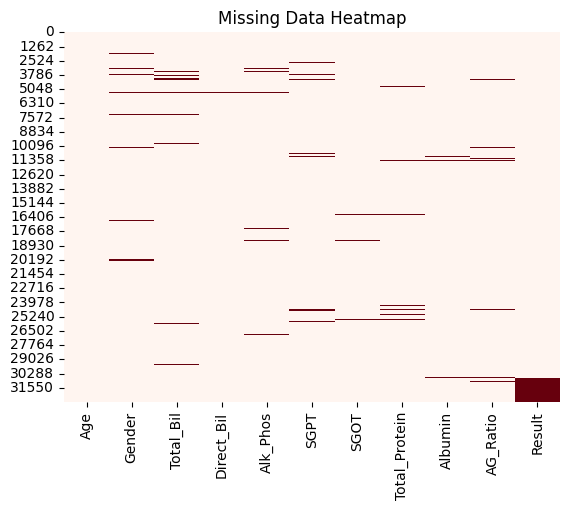

In [617]:
#Heatmap to show the ditrubuton of the missing records. The records could be ranodm or systamatic. 
sns.heatmap(data.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Data Heatmap")
plt.show()

Out of interest i wanted to see the null values for each feature plotted on a heatmap to see if there were entire rows that had missing values or just a couple of features missing per row. I interestingly found out that the missing values mostly seem random apart from the result column. There seems to be a large volume of missing data clustered together at the end. 

## 3.3 Exploring features in the dataset

### 3.3.1 Histogram for numeric feature and their distributions

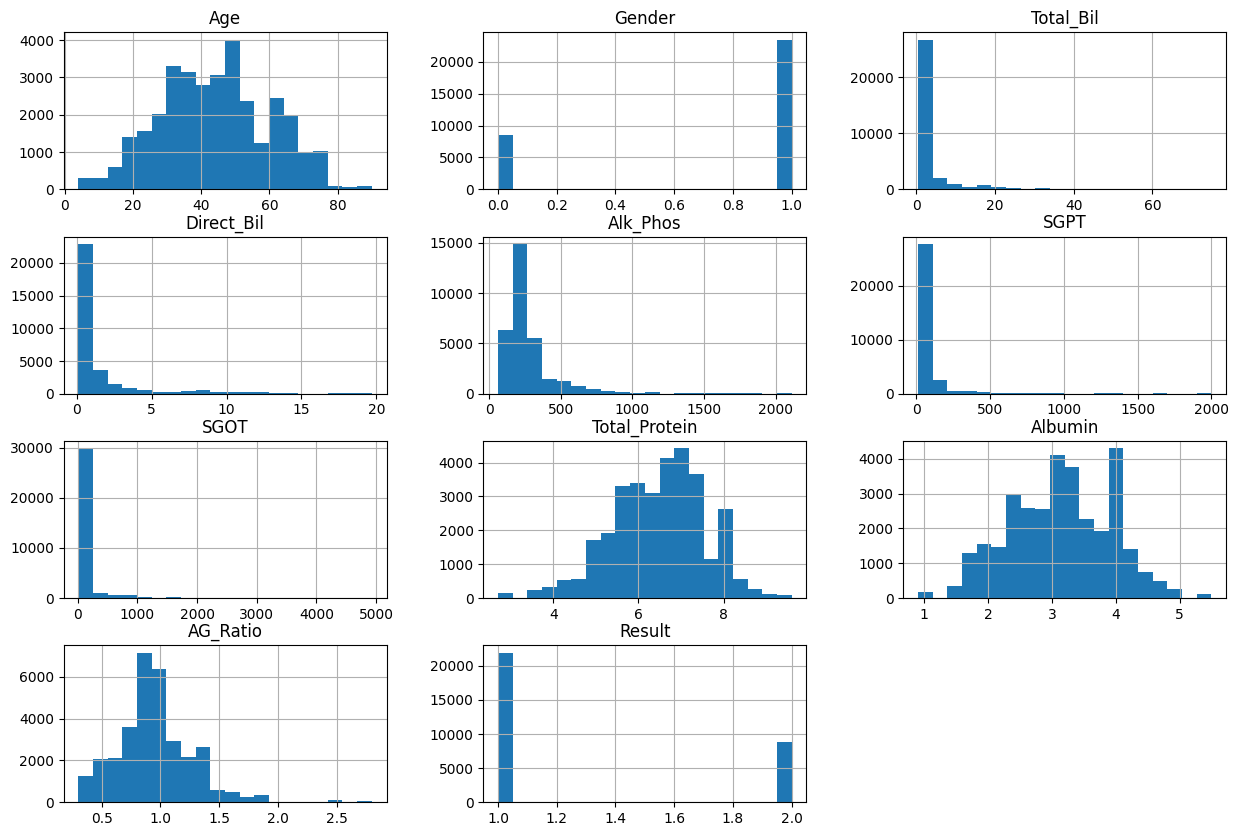

In [618]:
#Plots histogram for all numeric features
data.hist(bins=20, figsize=(15, 10))
plt.show()

### 3.3.2 Heatmap for identifying correlation between features

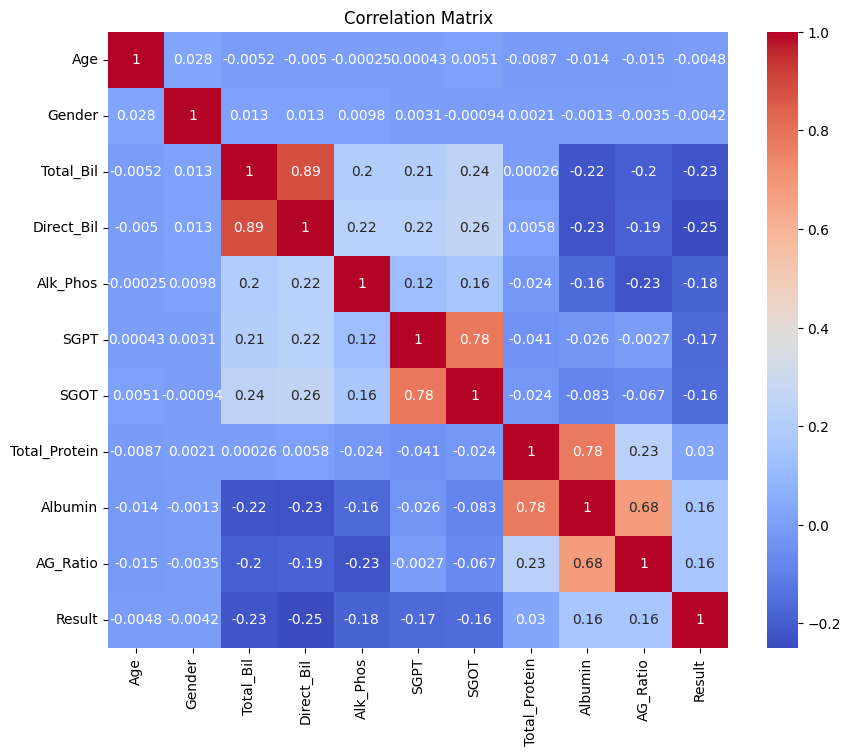

In [619]:
#Correlation Heatmap for all features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### 3.3.3 Distribution of 'Gender' and other analysis 

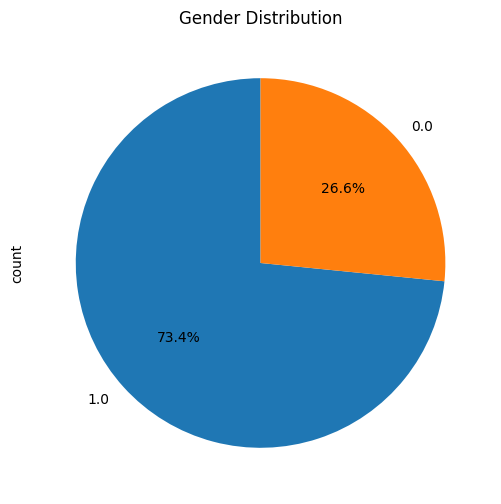

In [620]:
#Creates a new object that stores the gender as a series without the null values
gender_data = data['Gender'].dropna()

#Counts the number for Male and Female in the dataset
gender_counts = gender_data.value_counts()

#Making the pie chart
plt.figure(figsize=(6, 6))
plt.title('Gender Distribution')
gender_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=gender_counts.index,  # Labels for the pie sections
)
plt.show()


<Axes: xlabel='Gender', ylabel='Age'>

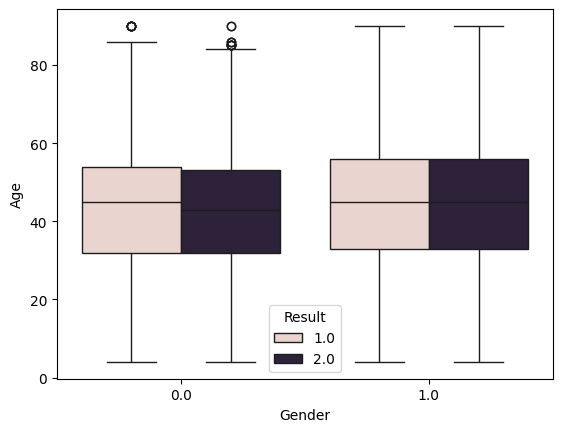

In [621]:
#Creates a box plot to show Age, Gender, Liver disease and no liver disease
sns.boxplot(data=data, x="Gender", y="Age", hue="Result")

### 3.3.4 Distribution of 'Result' - if a patient has liver disease or not

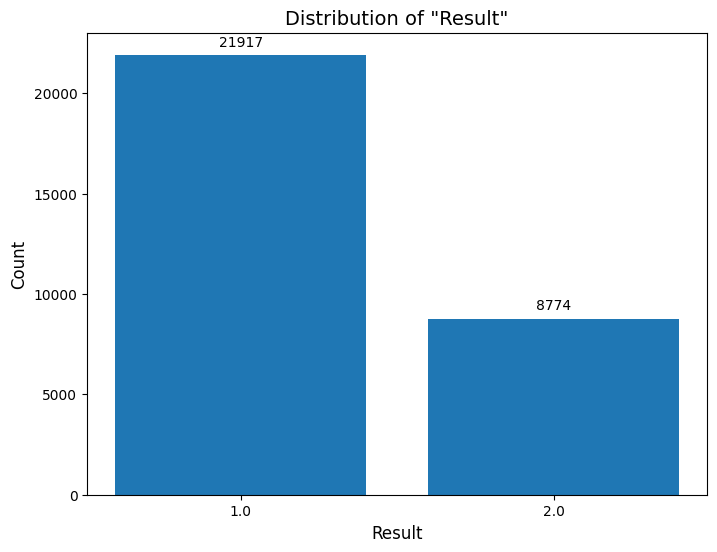

In [622]:
#Creates a new object that stores the result as a series and gets the indivisual counts for liver disease and no liver disease
result_counts = data['Result'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))

#formatting for the bar chart or else the bars would misallign 
bar_positions = range(len(result_counts.index))
plt.bar(bar_positions, result_counts.values, tick_label=result_counts.index)

#Loops through and gets the count for both catagories of result(either have liver disease or not) and displays above the bar chart
for i, count in enumerate(result_counts.values):
    plt.text(i, count + 0.02 * max(result_counts.values),
             str(count), ha='center', fontsize=10)

# Add label and titles to the bar chart
plt.xlabel('Result', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of "Result"', fontsize=14)
plt.xticks(bar_positions, result_counts.index, fontsize=10)
plt.yticks(fontsize=10)

plt.show()


In [623]:

# Count the instances of each class in the target variable
class_counts = data['Result'].value_counts()
class_percentages = data['Result'].value_counts(normalize=True) * 100

# Display the counts and percentages
print("Class Distribution (Counts):")
print(class_counts)
print("\nClass Distribution (Percentages):")
print(class_percentages)

Class Distribution (Counts):
Result
1.0    21917
2.0     8774
Name: count, dtype: int64

Class Distribution (Percentages):
Result
1.0    71.411815
2.0    28.588185
Name: proportion, dtype: float64


### 3.3.5 Age in relation to Liver disease

<Axes: xlabel='Result', ylabel='Age'>

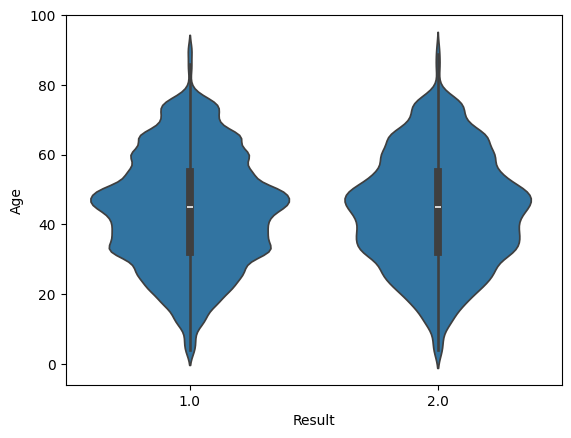

In [624]:
#Creates a violin plot to show Age with liver disease and no liver disease
sns.violinplot(data=data, x="Result", y="Age")

### 3.3.6 Liver disease and 'AG_Ratio'

<Axes: xlabel='Result', ylabel='AG_Ratio'>

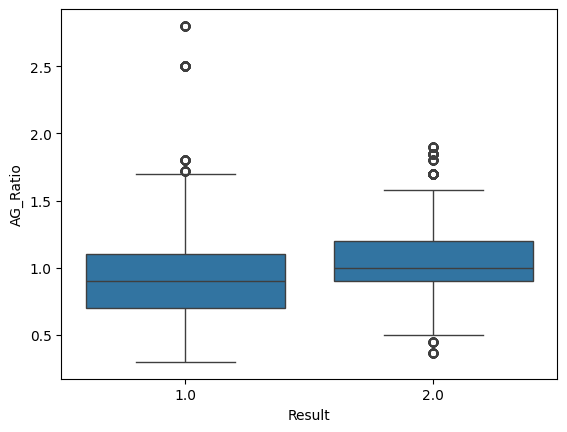

In [625]:
# Cretes a box plot for result and AG Ratio
sns.boxplot(data=data, x="Result", y="AG_Ratio")

### 3.3.7 Direct Bil Corelation

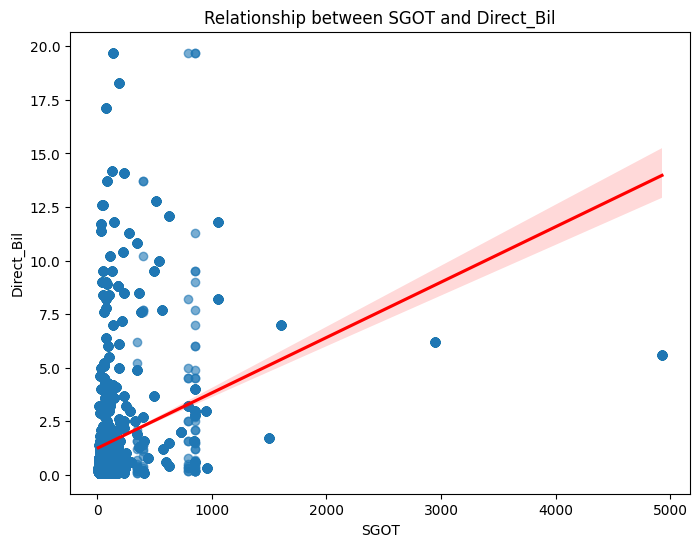

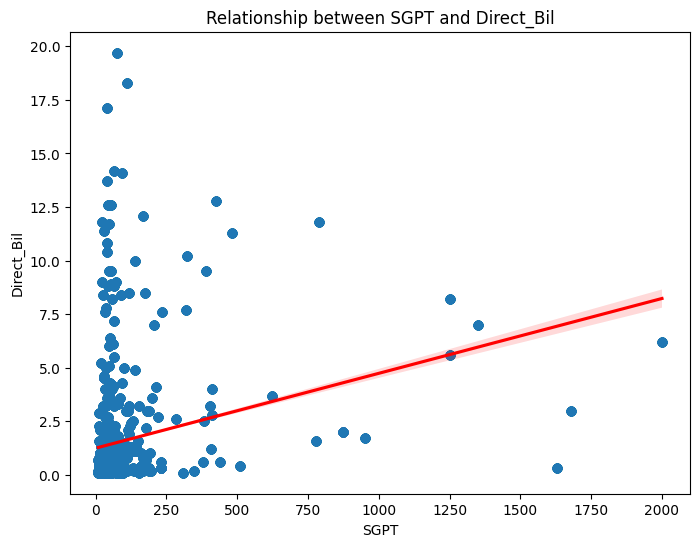

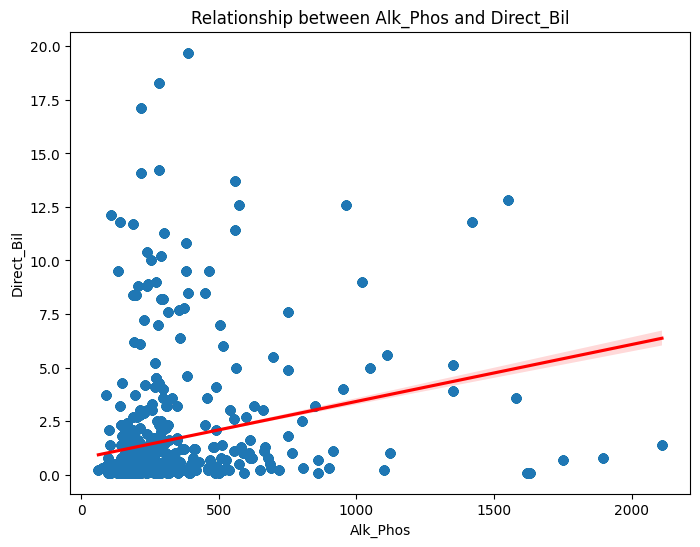

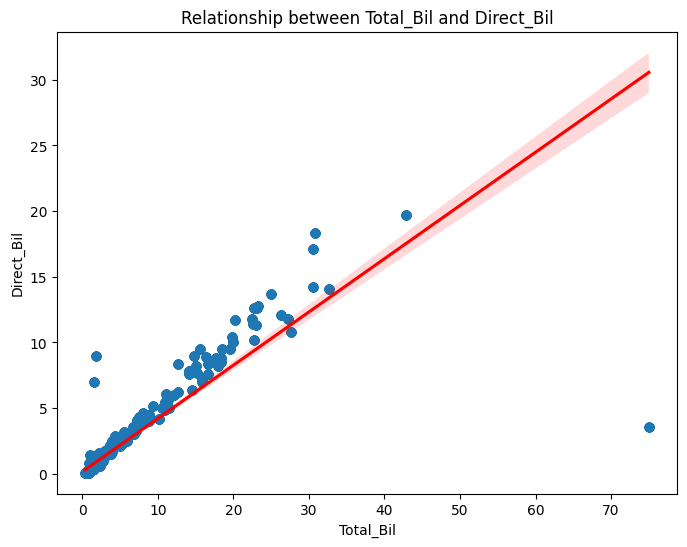

In [626]:
# Plot scatter plots with regression lines for Direct bil and compares it to SGOT,SGPT,Alk_Phos and Total_Bil
features = ['SGOT', 'SGPT', 'Alk_Phos', 'Total_Bil']

#For loop so it can itterate through the features array and plot the same scatter plot for all the features listed
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=feature, y='Direct_Bil', data=data, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
    plt.title(f'Relationship between {feature} and Direct_Bil')
    plt.xlabel(feature)
    plt.ylabel('Direct_Bil')
    plt.show()

## 3.4 Outliers

### 3.4.1 Overview of all outliers for each feature

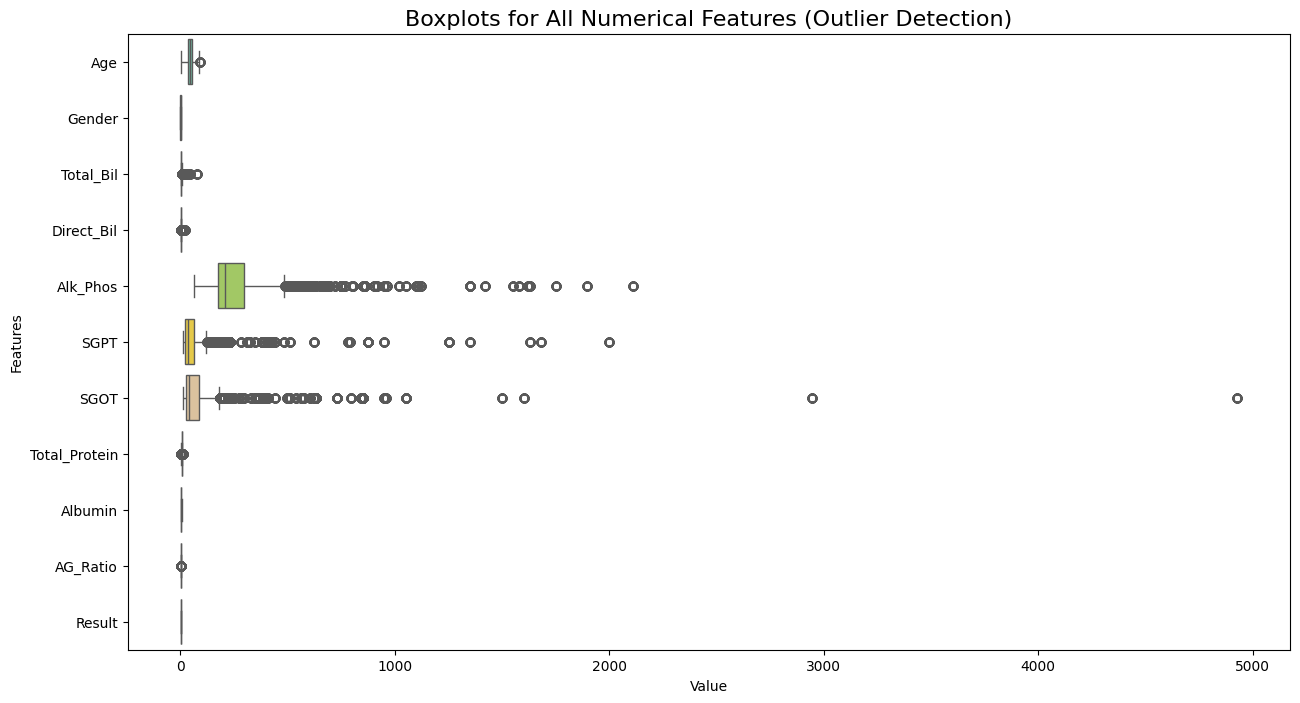

In [627]:
#Select only numerical features, specifies int64 because of gender
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots for all numerical features identified from previosu line
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[numerical_features], orient='h', palette="Set2")
plt.title("Boxplots for All Numerical Features (Outlier Detection)", fontsize=16)
plt.xlabel("Value")
plt.ylabel("Features")
plt.show()


### 3.4.2 Outliers for 'SGOT'

<Axes: xlabel='SGOT'>

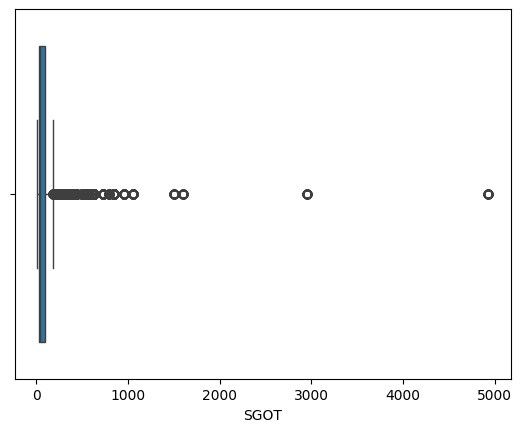

In [628]:
#Creates a box plot for SGOT
sns.boxplot(data=data, x="SGOT")

### 3.4.3 Outliers for 'SGPT'

<Axes: xlabel='SGPT'>

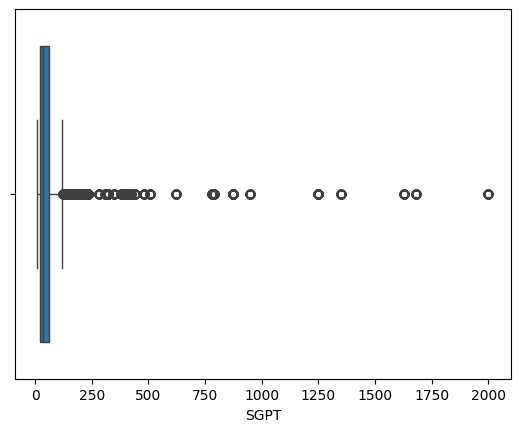

In [629]:
#Creates a box plot for SGPT
sns.boxplot(data=data, x="SGPT")

### 3.4.4 Outlier for 'Alk_Phos'

<Axes: xlabel='Alk_Phos'>

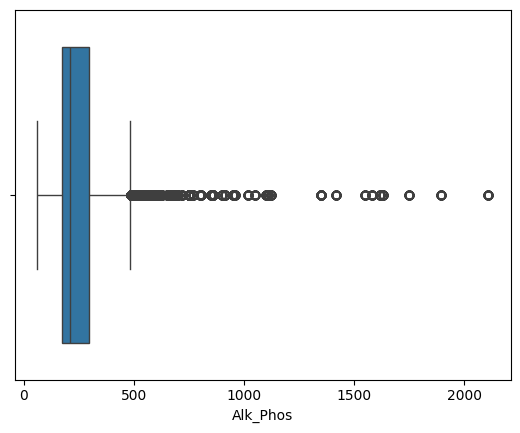

In [630]:
#Creates a box plot for Alk_Phos
sns.boxplot(data=data, x="Alk_Phos")

### 3.4.5 Outliers using statistics

#### 3.4.5.1 Summary Statistics for each feature

In [631]:
#Gives summary stats for all features
data.describe()

,Age,Gender,Total_Bil,Direct_Bil,Alk_Phos,SGPT,SGOT,Total_Protein,Albumin,AG_Ratio,Result
count,32799.000000,31899.000000,32153.000000,32240.000000,32005.000000,32263.000000,32339.000000,32338.000000,32307.000000,32226.000000,30691.000000
mean,44.159395,0.734224,3.376267,1.530301,289.422715,81.847906,112.126535,6.478224,3.129752,0.943885,1.285882
std,15.989867,0.441753,6.263683,2.869391,238.997410,182.891723,282.585778,1.082316,0.792224,0.323246,0.451841
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,1.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


#### 3.4.5.2 Using IQR to identify outliers within the data

Outliers: 6502, Non-Outliers: 26299


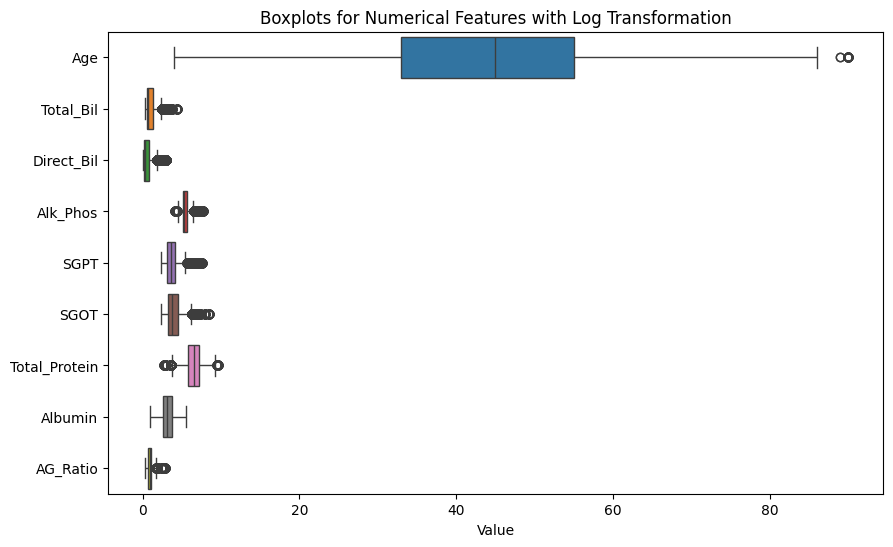

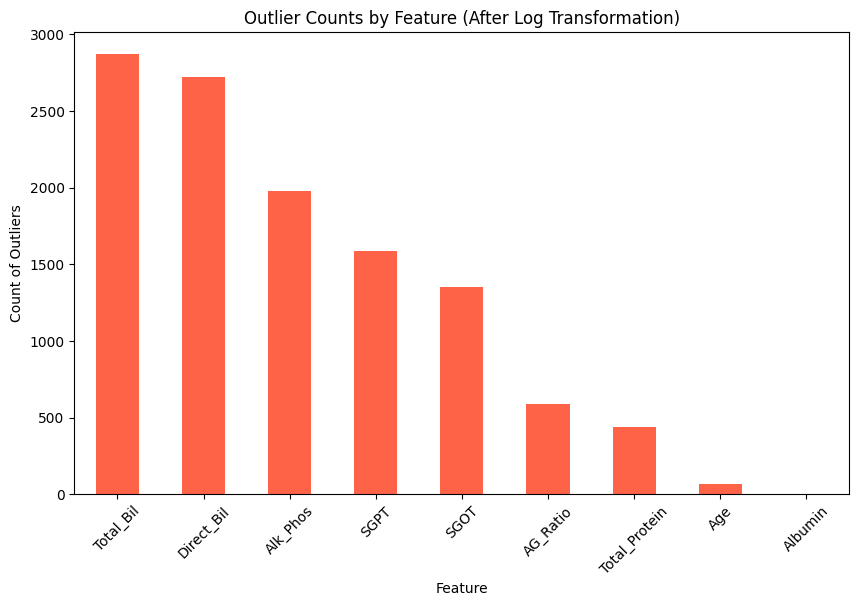

In [632]:
#All teh numeric features
numerical_features = ["Age", "Total_Bil", "Direct_Bil", "Alk_Phos", "SGPT", "SGOT", "Total_Protein", "Albumin", "AG_Ratio"]

#Array for all skewed features
skewed_features = ["Total_Bil", "Direct_Bil", "Alk_Phos", "SGPT", "SGOT"]

#Outlier dataframe created 
outliers = data.copy()

#Apply log transform to the skewed features array 
outliers[skewed_features] = np.log1p(outliers[skewed_features])

# DataFrame to store outlier flags
outlier_flags = pd.DataFrame(index=outliers.index)

#For loop to go through all numeric features and calculate IQR nad flag outliers 
for feature in numerical_features:
    Q1 = outliers[feature].quantile(0.25)
    Q3 = outliers[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_flags[feature] = (outliers[feature] < lower_bound) | (outliers[feature] > upper_bound)

#Combines outlier flags into a single column
outliers['Outlier'] = outlier_flags.any(axis=1)

#Split the data into outliers and non-outliers
outlier_data = outliers[outliers['Outlier']]
non_outlier_data = outliers[~outliers['Outlier']]

# Print summary of outliers and not outliers
print(f"Outliers: {outlier_data.shape[0]}, Non-Outliers: {non_outlier_data.shape[0]}")

# Boxplot for all features
plt.figure(figsize=(10, 6))
sns.boxplot(data=outliers[numerical_features], orient='h')
plt.title("Boxplots for Numerical Features with Log Transformation")
plt.xlabel("Value")
plt.show()

# Bar chart for outliers 
outlier_counts = outlier_flags.sum()
plt.figure(figsize=(10, 6))
outlier_counts.sort_values(ascending=False).plot(kind='bar', color='tomato')
plt.title("Outlier Counts by Feature (After Log Transformation)")
plt.ylabel("Count of Outliers")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.show()


## 3.5 Duplicates

### 3.5.1 Number of Duplicates

Number of duplicate rows: 11460


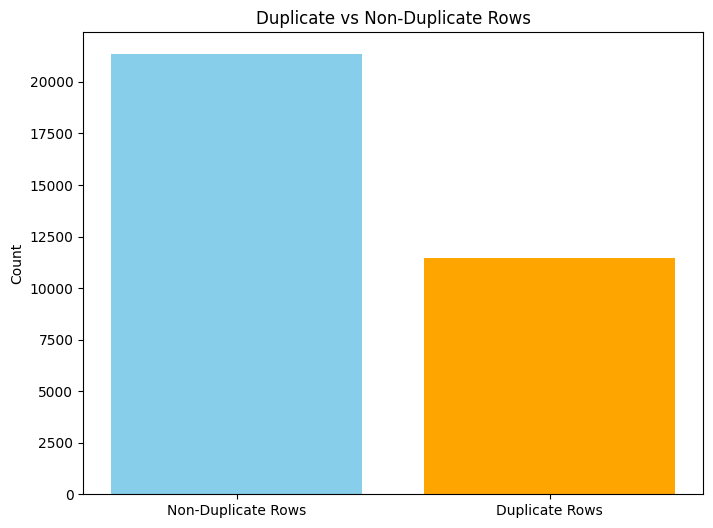

In [633]:
#Identify duplicate rows and prints out the sum of teh duplicate rows
duplicate_rows = data.duplicated()
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

#Counts the duplicate and non-duplicate rows
num_duplicates = data.duplicated().sum()
num_non_duplicates = len(data) - num_duplicates

#Creates two catagories and has counts for each catagory
categories = ['Non-Duplicate Rows', 'Duplicate Rows']
counts = [num_non_duplicates, num_duplicates]

#Bar chart for duplicate and not duplicate rows
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['skyblue', 'orange'])
plt.title('Duplicate vs Non-Duplicate Rows')
plt.ylabel('Count')
plt.show()




## Key Findings from EDA

#### Missing Values:
- All the features have atleast one missing value that needs to be addressed before moving on to modeling
- 'Result' has a lot of missing values which may be hard to deal with as it is the target feature

#### Distribution of numeric features:
- 'Age' , 'Total_Protein' , 'Albumin' and 'AG_Ratio' roughly follows a normal distributuion 
- There are a lot more Males compared to Females within the dataset
- 'Alk_Phos' , 'SGPT' , 'SGOT' , 'Total_Bil' and 'Direct_Bil' is skewed to the right
- 'Result' isn't balanced as there are a lot more patients with liver disease compared to the non liver disease patients

#### Heatmap to show correlation between each feature:
- 'Direct_Bil' and 'Total_Bil' are highly correlated (0.89) 
- 'SGPT' and 'SGOT' are highly correlated (0.78)
- 'Albumin' and 'Total_Protein' are highly correlated (0.78)
- 'AG_Ratio' and 'Albumin' are highly correlated (0.68)
The above findings are valid as for example if a patient does have liver disease, more SGPT and SGOT are released into the body

#### Liver disease compared to Non Liver disease:
- there appears to be a significantly larger records of patients with liver disease compared to the patients that don't have liver disease - roughly a 70/30 split

#### Age in relation to liver disease:
- From the violin plot the age of patients with and without liver disease seems to be the same. This may suggest that Age alone isn't a strong enough factor to predict liver disease.

#### Liver disease and 'AG_Ratio':
- For patients with liver disease, the IQR is wider which shows more variability wheras patients without liver disease smaller IQR. This refelcts smaller variability in the AG_Ratio

#### Outliers:
- From initial inspection there seems to be a lot of outliers but at a closer look at the features in conjunction with each other it is expected that a there will be a lot of outliers. For example, the liver releases a lot of SGPT and SGOT in the case of liver disease and both these features are highly correlated as seem from previous steps. It would amke sense that there would be a lot of 'outlier' because high volume of these proteins do indicate liver disease. Keeping these so called outliers is vital as it discarding them would mean that we lose vital information. Also keeping the outliers means that there are records of extreme cases of liver disease that the model can account for in the future.

#### Duplicates:
- from the EDA we can see that there are a lot of duplicate rows from inspection.

# **4. Pre-processing**

In [634]:
#Creates a new dataframe to store the clean data after pre pocessing
clean_data = data.copy()


creates a new datframe called 'clean_data' so I can clean the data and store it somewhere. This will come in handy when it comes to comparing how the data has changed before and after cleaning.

## 4.0 Dealing with Duplicates 

In [635]:
#Drops duplicates in clean_data and displays the dimensions of the clean_data dataframe
clean_data = clean_data.drop_duplicates()
clean_data.shape

(21341, 11)

## 4.1 Changing catagorical features into numeric features
This step was already completed during EDA to be able to plot and manipulate the feature easier to find trends and patterns within the data. This step would usually be done here but thought it would be worth including the code for cronological steps. The two lines commented out are how you would complete this step.

In [636]:
#Converts gender from object data type to float64
#data['Gender'] = data['Gender'].map({'Male': 1.0, 'Female': 0.0})

#prints the first 5 records to confirm if gender was mapped correctly
clean_data.head()

,Age,Gender,Total_Bil,Direct_Bil,Alk_Phos,SGPT,SGOT,Total_Protein,Albumin,AG_Ratio,Result
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0


In [637]:
#Confirmed that the 'Gender' feature data type changed from object to float64
clean_data['Gender'].dtype

dtype('float64')

## 4.2 Mapping 'Result' 2:1 and 1:0

In [638]:
#Before mapping
clean_data.head()

,Age,Gender,Total_Bil,Direct_Bil,Alk_Phos,SGPT,SGOT,Total_Protein,Albumin,AG_Ratio,Result
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0


In [639]:
#Maps Results (2:1, 1:0) and displays the first 5 records to confirm
clean_data.loc[:,'Result'] = data['Result'].map({1.0: 0.0, 2.0: 1.0})
clean_data.head()

,Age,Gender,Total_Bil,Direct_Bil,Alk_Phos,SGPT,SGOT,Total_Protein,Albumin,AG_Ratio,Result
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,0.0
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,0.0
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,0.0
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,0.0
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,0.0


## 4.3 Number of unique rows have at least one missing value

In [640]:
#Checking how many rows have at least one missing value
rows_with_missing_values = clean_data[clean_data.isnull().any(axis=1)]
rows_with_missing_values

,Age,Gender,Total_Bil,Direct_Bil,Alk_Phos,SGPT,SGOT,Total_Protein,Albumin,AG_Ratio,Result
6,26.0,0.0,0.9,0.2,154.0,NaN,12.0,7.0,3.5,1.00,0.0
21,51.0,1.0,2.9,1.3,482.0,22.0,NaN,7.0,2.4,0.50,0.0
22,62.0,1.0,NaN,3.0,542.0,116.0,66.0,6.4,3.1,0.90,0.0
23,40.0,NaN,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,0.0
37,46.0,0.0,14.2,7.8,374.0,NaN,77.0,4.3,2.0,0.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...
32796,36.0,1.0,3.2,1.6,257.0,33.0,116.0,5.7,2.2,0.62,NaN
32797,36.0,1.0,1.2,0.4,179.0,63.0,39.0,6.1,3.3,1.10,NaN
32798,36.0,1.0,0.6,0.1,272.0,24.0,98.0,5.0,2.0,0.60,NaN
32799,24.0,0.0,5.8,3.0,661.0,181.0,285.0,5.7,2.3,0.67,NaN


## 4.4 Handling missing values

There a quite a few missing values within the dataset and each of them need to be addressed in different ways as some methods are far more appropreite compared to others

### 4.4.1 Age

In [641]:
#Impute missing Age with the mean
clean_data.loc[:, 'Age'] = clean_data['Age'].fillna(clean_data['Age'].mean())

### 4.4.2 Gender

In [642]:
# Impute missing Gender with the mode
clean_data.loc[:, 'Gender'] = clean_data['Gender'].fillna(clean_data['Gender'].mode()[0])

### 4.4.3 Total_Bil

In [643]:
#Filling in missing values with median
clean_data.loc[:, 'Total_Bil'] = clean_data['Total_Bil'].fillna(clean_data['Total_Bil'].median())

### 4.4.4 Direct_Bil

In [644]:
#Fills missing values with median
clean_data.loc[:, 'Direct_Bil'] = clean_data['Direct_Bil'].fillna(clean_data['Direct_Bil'].median())

### 4.4.5 Alk_Phos

In [645]:
#Fills missing values with median
clean_data.loc[:, 'Alk_Phos'] = clean_data['Alk_Phos'].fillna(clean_data['Alk_Phos'].median())

### 4.4.6 SGPT

In [646]:
#Uses median to fill in the missing values
clean_data.loc[:, 'SGPT'] = clean_data['SGPT'].fillna(clean_data['SGPT'].median())

### 4.4.7 SGOT

In [647]:
#Fills in missing SGOT values with the median 
clean_data.loc[:, 'SGOT'] = clean_data['SGPT'].fillna(clean_data['SGOT'].median())

### 4.4.8 Total_Protein

In [648]:
#Filling in missing values with mean
clean_data.loc[:, 'Total_Protein'] = clean_data['Total_Protein'].fillna(clean_data['Total_Protein'].mean())

### 4.4.9 Albumin

In [649]:
#Fill missing values with mean
clean_data.loc[:, 'Albumin'] = clean_data['Albumin'].fillna(clean_data['Albumin'].mean())

### 4.4.10 AG_Ratio

In [650]:
# Fill missing values in 'AG_Ratio' column with its median
clean_data.loc[:, 'AG_Ratio'] = clean_data['AG_Ratio'].fillna(clean_data['AG_Ratio'].median())


### 4.4.11 Result

In [651]:
#Drop missing values from the 'Result' column
clean_data = data.dropna(subset=['Result'])



In [ ]:
#Putting all teh imputation in one place to get overview instead of looking into each markdown
clean_data.loc[:, 'Age'] = clean_data['Age'].fillna(clean_data['Age'].mean())
clean_data.loc[:, 'Gender'] = clean_data['Gender'].fillna(clean_data['Gender'].mode()[0])
clean_data.loc[:, 'Total_Bil'] = clean_data['Total_Bil'].fillna(clean_data['Total_Bil'].median())
clean_data.loc[:, 'Direct_Bil'] = clean_data['Direct_Bil'].fillna(clean_data['Direct_Bil'].median())
clean_data.loc[:, 'Alk_Phos'] = clean_data['Alk_Phos'].fillna(clean_data['Alk_Phos'].median())
clean_data.loc[:, 'SGPT'] = clean_data['SGPT'].fillna(clean_data['SGPT'].median())
clean_data.loc[:, 'SGOT'] = clean_data['SGOT'].fillna(clean_data['SGOT'].median())
clean_data.loc[:, 'Total_Protein'] = clean_data['Total_Protein'].fillna(clean_data['Total_Protein'].mean())
clean_data.loc[:, 'Albumin'] = clean_data['Albumin'].fillna(clean_data['Albumin'].mean())
clean_data.loc[:, 'AG_Ratio'] = clean_data['AG_Ratio'].fillna(clean_data['AG_Ratio'].median())

In step '3.1' i changed 'Gender' from a object data type into a float64 so i could do EDA more effectivly, such as creating a correlation heatmap which requires all featires to be in a numeric format. While the 'Gender' feature is in a suitable format for a machine learning model, it isn't in the most appropriete datatype. Instead of a float64 it needs to be int data type. As in the dataset there are only two genders 'Male' and 'Female' i will be changing 'Gender' from float64 into int datatype. In order to do that first all missing values for 'Gender' needed to be filled in, which we just done.

## 4.5 Verifying that all missing values have been filled in

In [653]:
#Checking for missing values
clean_data.isnull().sum()

Age              0
Gender           0
Total_Bil        0
Direct_Bil       0
Alk_Phos         0
SGPT             0
SGOT             0
Total_Protein    0
Albumin          0
AG_Ratio         0
Result           0
dtype: int64

## 4.6 Gender datatype from float64 into int

In [654]:
#Converts Gender feature into int datatype and prints datatype to verify conversion
clean_data.loc[:, 'Gender'] = clean_data['Gender'].astype(int)

## 4.7 Balancing 'Result' class using SMOTE

In [656]:
#creates a new dataframe called and checks the total missing values for each feature
unbalanced_clean_data = clean_data.copy()
missingvalues = unbalanced_clean_data.isnull().sum()
missingvalues, missingvalues.sum()

(Age              0
 Gender           0
 Total_Bil        0
 Direct_Bil       0
 Alk_Phos         0
 SGPT             0
 SGOT             0
 Total_Protein    0
 Albumin          0
 AG_Ratio         0
 Result           0
 dtype: int64,
 np.int64(0))

In [657]:
#Prints the count for each class in the result feature (0 is no liver disease and 1 is liver disease)
count = clean_data['Result'].value_counts()
print(count)



Result
1.0    21917
2.0     8774
Name: count, dtype: int64


(array([    0.,  5000., 10000., 15000., 20000., 25000.]),
 [Text(0, 0.0, '0'),
  Text(0, 5000.0, '5000'),
  Text(0, 10000.0, '10000'),
  Text(0, 15000.0, '15000'),
  Text(0, 20000.0, '20000'),
  Text(0, 25000.0, '25000')])

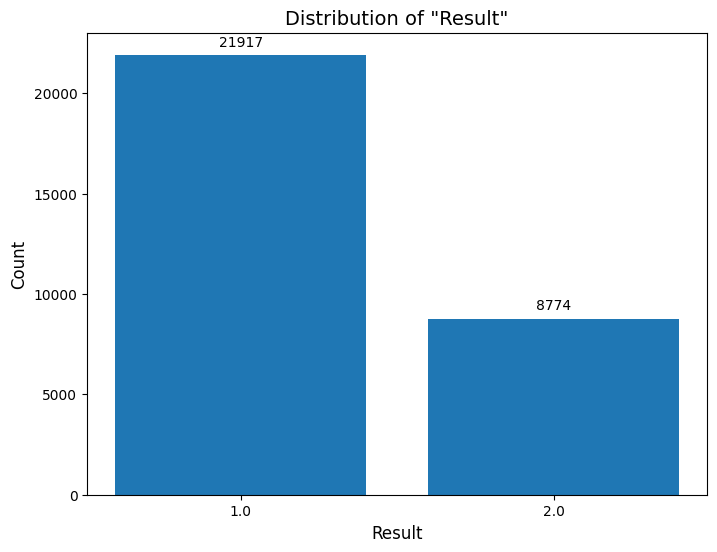

In [658]:
#gets the count for the result feature in the dataset
result_counts = clean_data['Result'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))

#formatting for the bar chart or else the bars would misallign 
bar_positions = range(len(result_counts.index))
plt.bar(bar_positions, result_counts.values, tick_label=result_counts.index)

#Loops through and gets the count for both catagories of result(either have liver disease or not) and displays above the bar chart
for i, count in enumerate(result_counts.values):
    plt.text(i, count + 0.02 * max(result_counts.values),
             str(count), ha='center', fontsize=10)

# Add label and title
plt.xlabel('Result', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of "Result"', fontsize=14)
plt.xticks(bar_positions, result_counts.index, fontsize=10)
plt.yticks(fontsize=10)

In [659]:
# Separate other features and result
X = clean_data.drop('Result', axis=1) 
y = clean_data['Result']               

#SMOTE on the training dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

#Train test split, 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, stratify=y_smote, test_size=0.2, random_state=42)

#Check distribution after SMOTE for each class
print("Class distribution before SMOTE:", Counter(y))
print("Class distribution after SMOTE:", Counter(y_smote))

Class distribution before SMOTE: Counter({1.0: 21917, 2.0: 8774})
Class distribution after SMOTE: Counter({1.0: 21917, 2.0: 21917})


## 4.8 Before Vs After Preprocessing

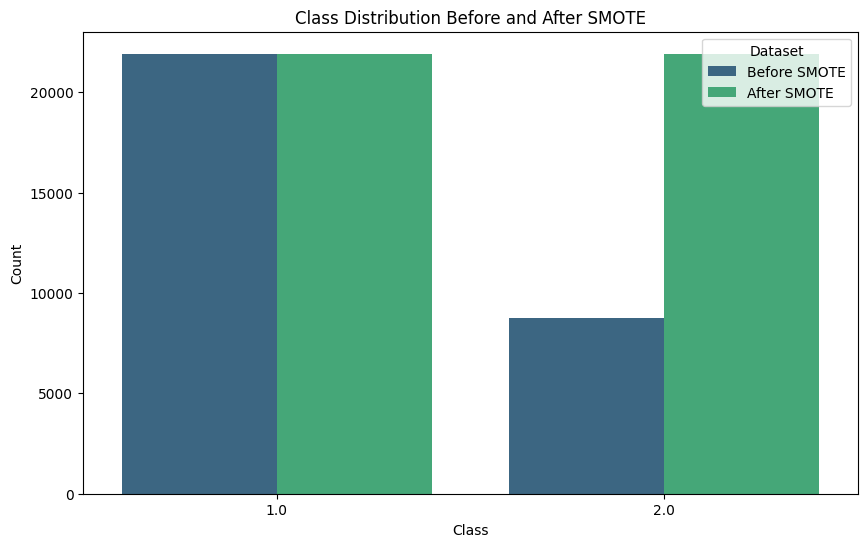

In [ ]:
#Convert y_train and y_train_smote to DataFrames for plotting
df_before = pd.DataFrame({'Class': y})
df_after = pd.DataFrame({'Class': y_smote})

#Adds a indicator
df_before['Dataset'] = 'Before SMOTE'
df_after['Dataset'] = 'After SMOTE'

# Combine dataframes into one
df_combined = pd.concat([df_before, df_after])

#Barchart plotting befor and after SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(data=df_combined, x='Class', hue='Dataset', palette='viridis')
plt.title('Class Distribution Before and After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Dataset')
plt.show()

# **5. Feature Selection**

## Drop high correlated features

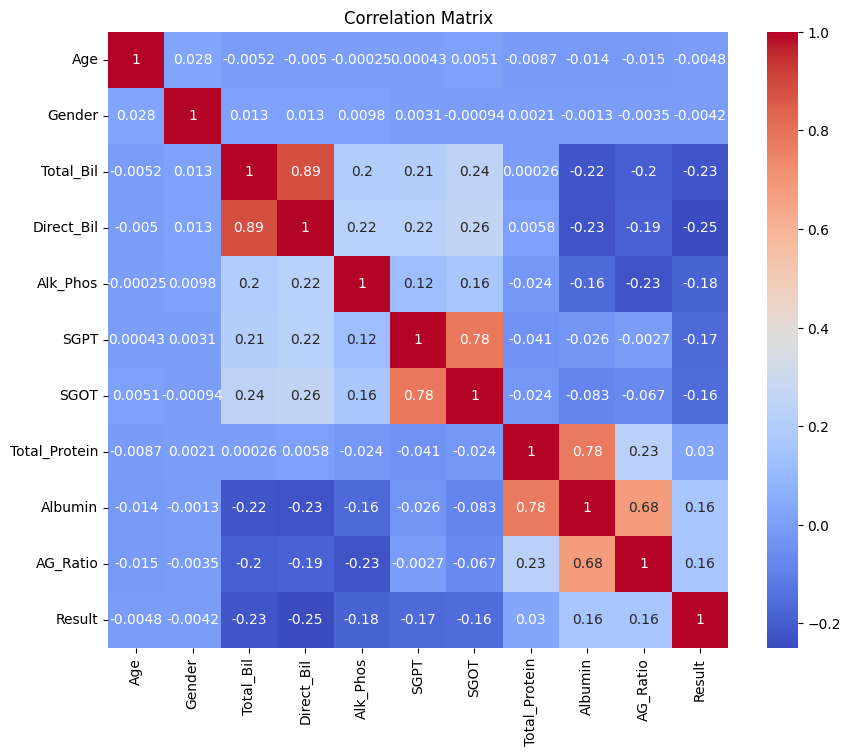

In [661]:
#Correlation heatmap for all features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

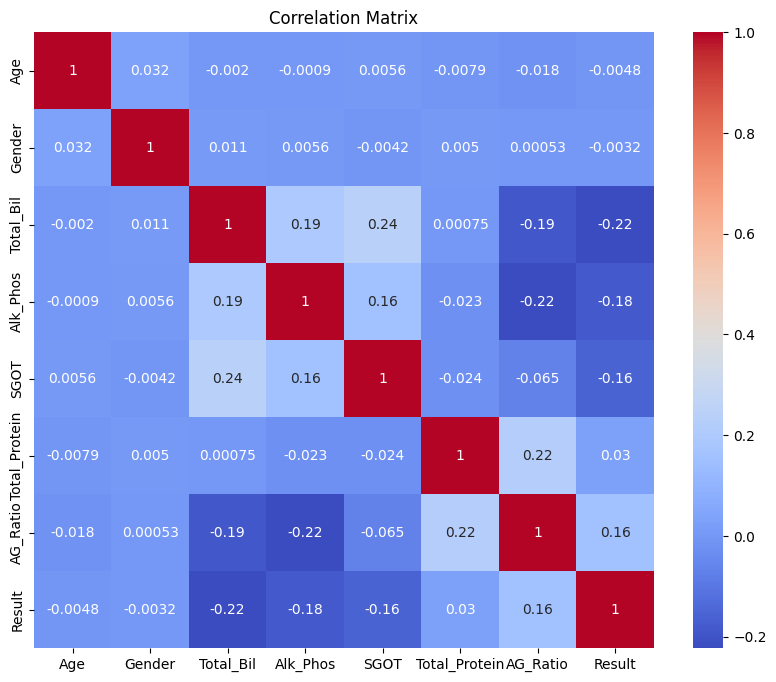

In [662]:
#Creates an array with the features that need to be dropped because they are highly correlated
column_to_drop = ['Direct_Bil', 'Albumin','SGPT']
oversampled_data = clean_data.drop(columns=column_to_drop)

#Plots correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(oversampled_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# **6. Models**

## 6.1 XGBoost

### 6.1.1 Train
Running a base model to see how the model performs before any other parameters are changed or modified

c:\Users\diasr\miniconda3\envs\liver\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:28:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Training Data Evaluation ---
Accuracy: 0.9996007528660241

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17533
         1.0       1.00      1.00      1.00     17533

    accuracy                           1.00     35066
   macro avg       1.00      1.00      1.00     35066
weighted avg       1.00      1.00      1.00     35066



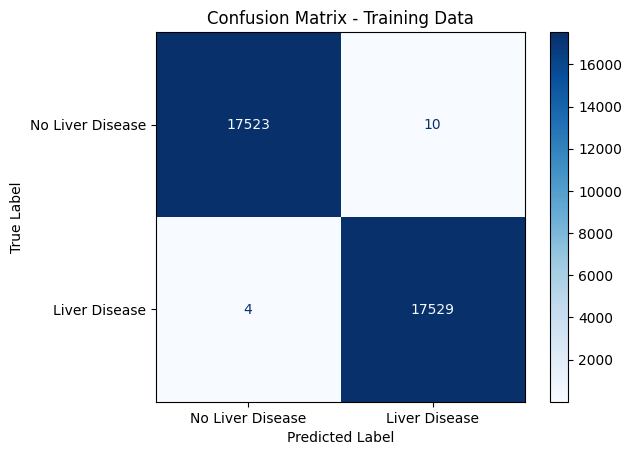

In [ ]:
#Sets a seed for repeatability 
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Separate features
X = clean_data.drop('Result', axis=1) 
#serperates target 
y = clean_data['Result']              

#had an issue with mapping (2:1 and 1:0) so subtracted 1 from target value to resolve issue
y = y - 1

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

#oNly applys SMOTE to training dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#Training the XgbOOST model
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

#Trains the XGBoost model usng the training data
xgb_model.fit(X_train_smote, y_train_smote)

#Predict on training data
y_train_pred = xgb_model.predict(X_train_smote)

#Accuracy and classification 
print("Accuracy:", accuracy_score(y_train_smote, y_train_pred))
print("\nClassification Report:")
print(classification_report(y_train_smote, y_train_pred))

# Confusion Matrix
cm_train = confusion_matrix(y_train_smote, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=["No Liver Disease", "Liver Disease"])
disp_train.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 6.1.2 Cross Validation for XGBoost
Accuracy was very high for the baseline model, usign cross validation to ensure that the split of the dataset wasn't the reason why the modesl performace was so high

In [ ]:
#Single label format for y train, does one hot to single converting
if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    y_train = y_train.argmax(axis=1)  

# Create a pipeline with SMOTE and the XGBoost model
pipeline = make_pipeline(
    SMOTE(random_state=42),
    xgb.XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        use_label_encoder=False,
        random_state=42
    )
)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))

c:\Users\diasr\miniconda3\envs\liver\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:28:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\diasr\miniconda3\envs\liver\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:28:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\diasr\miniconda3\envs\liver\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:28:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\User

Cross-Validation Scores: [0.99592834 0.997557   0.99918534 0.99755601 0.99714868 0.99633401
 0.99674134 0.99837067 0.99837067 0.99837067]
Mean Cross-Validation Accuracy: 0.99755627350949


### 6.1.3 Hyperperameter Tuning of XGBoost and applying that to test set
Using Gridsearch to find the best parameters for the XGBoost model

In [ ]:
#Parameters that needs to be tested in teh gridsearch
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 5, 10],
    'scale_pos_weight': [1, 2, 3]
}

#Initalize a gridsearch object
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", use_label_encoder=False, random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

#Runs gridsearch
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\diasr\miniconda3\envs\liver\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\diasr\miniconda3\envs\liver\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:28:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'scale_pos_weight': 1}


### 6.1.4 Reinitalizing with best parameters

In [666]:
# Initialize the model with the best parameters
best_xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    learning_rate= 0.2,
    max_depth=7,      
    min_child_weight=1,  
    n_estimators=300,   
    scale_pos_weight=2,  
    random_state=42
)

c:\Users\diasr\miniconda3\envs\liver\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:28:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Training Data Evaluation (Tuned Model) ---
Accuracy: 0.9999429646951463

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17533
         1.0       1.00      1.00      1.00     17533

    accuracy                           1.00     35066
   macro avg       1.00      1.00      1.00     35066
weighted avg       1.00      1.00      1.00     35066



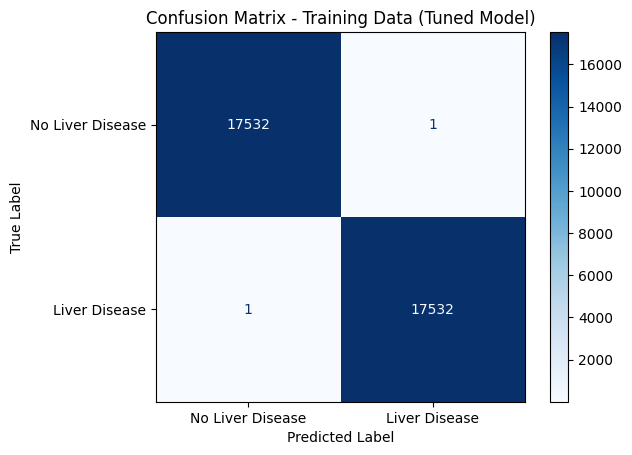

In [ ]:
#runs XGBoost on the train data with SMOTE
best_xgb_model.fit(X_train_smote, y_train_smote)

#Training data prediction
y_train_pred_tuned = best_xgb_model.predict(X_train_smote)

#Report and accuracy
print("Accuracy:", accuracy_score(y_train_smote, y_train_pred_tuned))
print("\nClassification Report:")
print(classification_report(y_train_smote, y_train_pred_tuned))

# Confusion Matrix
cm_train_tuned = confusion_matrix(y_train_smote, y_train_pred_tuned)
disp_train_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_train_tuned, display_labels=["No Liver Disease", "Liver Disease"])
disp_train_tuned.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Training Data (Tuned Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 6.1.5 Training new model with the new parameters on test
Running the best model on the unseen test data

In [668]:
# Train the tuned model on the training data
best_xgb_model.fit(X_train, y_train)

c:\Users\diasr\miniconda3\envs\liver\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:28:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Accuracy on Test Set: 0.9973937123309985

Classification Report - Test Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4384
         1.0       1.00      0.99      1.00      1755

    accuracy                           1.00      6139
   macro avg       1.00      1.00      1.00      6139
weighted avg       1.00      1.00      1.00      6139



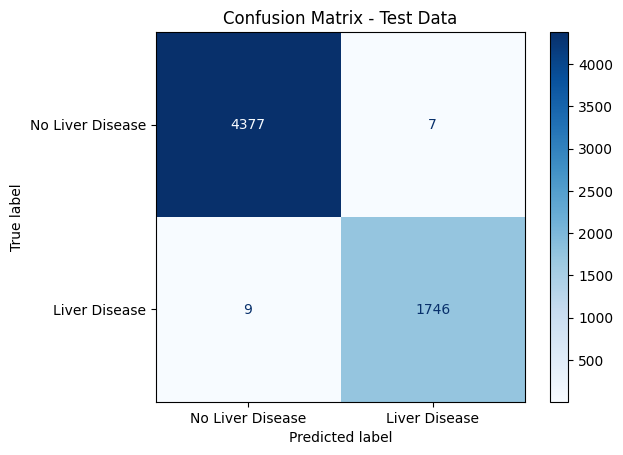

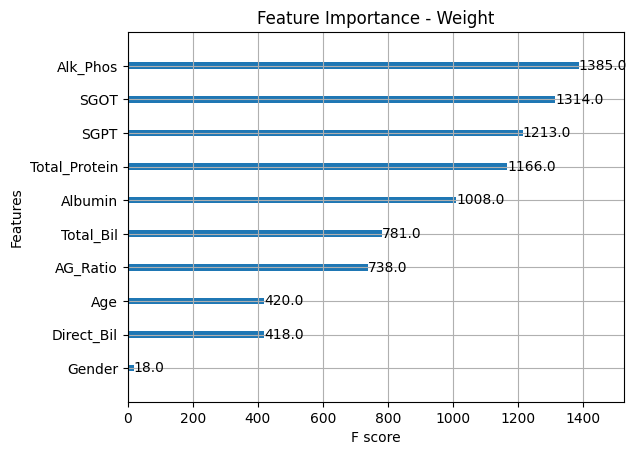

In [ ]:
#Evaluate the model on test data
y_test_classes = y_test.argmax(axis=1) if len(y_test.shape) > 1 and y_test.shape[1] > 1 else y_test
y_test_pred = best_xgb_model.predict(X_test)

# Print Accuracy
print("Accuracy on Test Set:", accuracy_score(y_test_classes, y_test_pred))

#Classification Report
print("\nClassification Report - Test Set:")
print(classification_report(y_test_classes, y_test_pred))

#Confusion Matrix
cm_test = confusion_matrix(y_test_classes, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["No Liver Disease", "Liver Disease"])
disp_test.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Data")
plt.show()

#Plot feature importance 
xgb.plot_importance(best_xgb_model, importance_type="weight")
plt.title("Feature Importance - Weight")
plt.show()


## 6.2 Deep Learning Model (Feedforward Neual Network)

### 6.2.1 Deep Learning Train
Training the model to get a baseline performace before any hyperperameter tunign was conducted

Epoch 1/200
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6551 - loss: 0.5887 - val_accuracy: 0.6915 - val_loss: 0.7227
Epoch 2/200
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.6908 - loss: 0.5341 - val_accuracy: 0.6955 - val_loss: 0.7013
Epoch 3/200
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.6990 - loss: 0.5241 - val_accuracy: 0.7109 - val_loss: 0.6662
Epoch 4/200
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.7049 - loss: 0.5149 - val_accuracy: 0.7193 - val_loss: 0.6339
Epoch 5/200
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.7135 - loss: 0.5041 - val_accuracy: 0.7270 - val_loss: 0.6084
Epoch 6/200
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.7182 - loss: 0.4940 - val_accuracy: 0.7134 - val_loss: 0.6014
Epoch 7/200
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.7233 - loss: 0.4837 - val_accuracy: 0.7519 - val_loss: 0.5639
Epoch 8/200
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.7348 - loss: 0.4

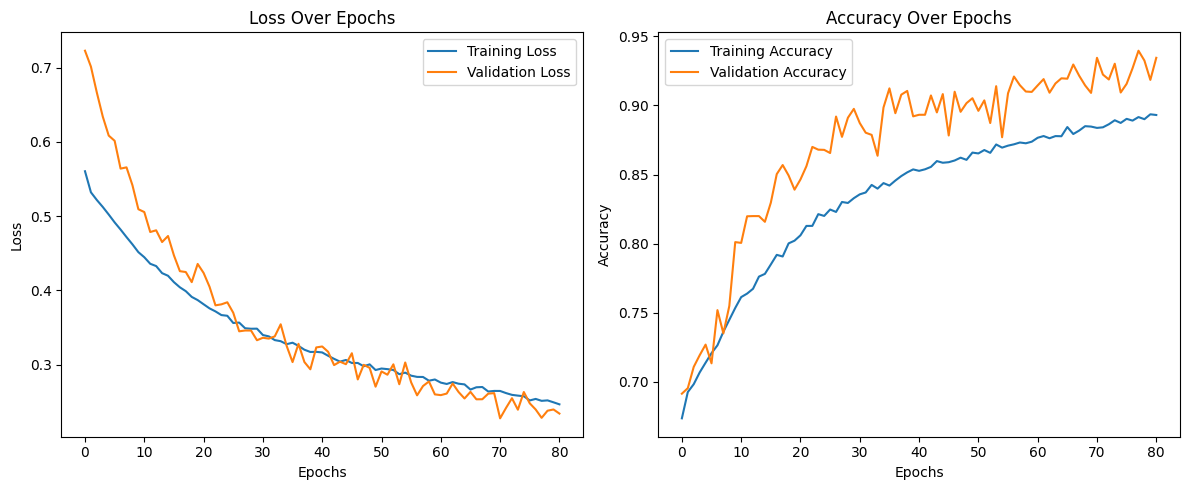

1096/1096 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step
Training Accuracy: 0.9371470940512177
Classification Report - Training Data:
              precision    recall  f1-score   support

           1       0.93      0.94      0.94     17533
           2       0.94      0.93      0.94     17533

    accuracy                           0.94     35066
   macro avg       0.94      0.94      0.94     35066
weighted avg       0.94      0.94      0.94     35066



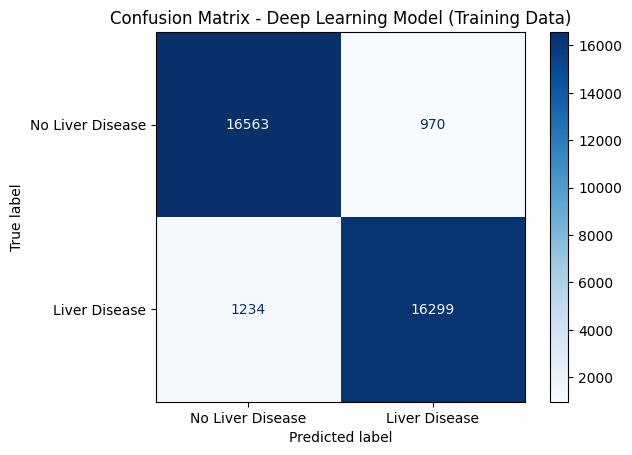

Training stopped at epoch: 81


In [ ]:
# Seeding to control random number generators for modules
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Separate features and target
X = clean_data.drop('Result', axis=1)
y = clean_data['Result']            

# Train-test split
X_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#Target varibale using one hot encoding
y_train_smote = tf.keras.utils.to_categorical(y_train_smote - 1, num_classes=2) 

#Scaling teh features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)

#Building the model
model = Sequential([
    Dense(64, activation='relu'),                             
    Dropout(0.2),                                                  
    Dense(32, activation='relu'),                               
    Dropout(0.1),                                                 
    Dense(2, activation='sigmoid')                            
])

#Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',         
    patience=10,                
    restore_best_weights=True  
)

#Model history
history = model.fit(
    X_train_smote, y_train_smote, 
    epochs=200,               
    batch_size=64,
    validation_split=0.2,      
    callbacks=[early_stopping], 
    verbose=1
)

#Loss and Accuracy
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Step 9: Evaluate the model on the training data
y_train_pred = model.predict(X_train_smote)

#mapping fixed by just adding 1 onto the y_train prediction to match the labels
y_train_pred_classes = y_train_pred.argmax(axis=1) + 1 

# Evaluate accuracy and classification report
y_train_smote_classes = y_train_smote.argmax(axis=1) + 1
print("Training Accuracy:", accuracy_score(y_train_smote_classes, y_train_pred_classes))
print("Classification Report - Training Data:")
print(classification_report(y_train_smote_classes, y_train_pred_classes))

# Create confusion matrix
cm_train = confusion_matrix(y_train_smote_classes, y_train_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=["No Liver Disease", "Liver Disease"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Deep Learning Model (Training Data)")
plt.show()

# Check what epoch training stopped
print(f"Training stopped at epoch: {len(history.history['loss'])}")


### 6.2.2 Hyperperameter tuning
Manually changing perameters and testing the model 

Epoch 1/1000
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6417 - loss: 0.5903 - val_accuracy: 0.7395 - val_loss: 0.7400
Epoch 2/1000
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.6950 - loss: 0.5322 - val_accuracy: 0.7525 - val_loss: 0.6872
Epoch 3/1000
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.7029 - loss: 0.5196 - val_accuracy: 0.7669 - val_loss: 0.6524
Epoch 4/1000
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.7052 - loss: 0.5070 - val_accuracy: 0.7491 - val_loss: 0.6139
Epoch 5/1000
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.7151 - loss: 0.4924 - val_accuracy: 0.7851 - val_loss: 0.5798
Epoch 6/1000
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.7229 - loss: 0.4820 - val_accuracy: 0.7870 - val_loss: 0.5573
Epoch 7/1000
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.7275 - loss: 0.4703 - val_accuracy: 0.8375 - val_loss: 0.5251
Epoch 8/1000
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.7427 - l

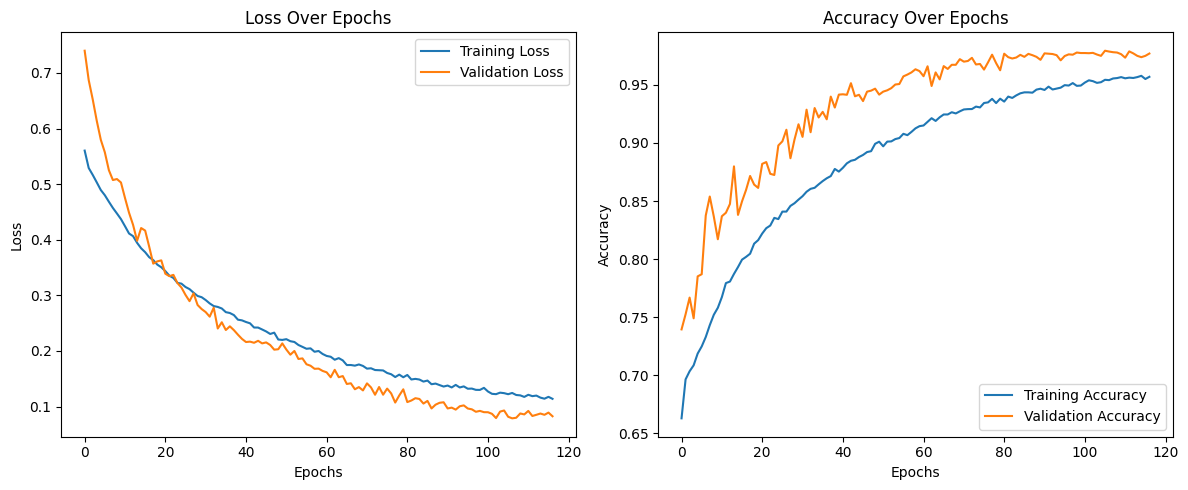

1096/1096 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step
Training Accuracy: 0.9829464438487424
Classification Report - Training Data:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98     17533
           2       0.98      0.98      0.98     17533

    accuracy                           0.98     35066
   macro avg       0.98      0.98      0.98     35066
weighted avg       0.98      0.98      0.98     35066



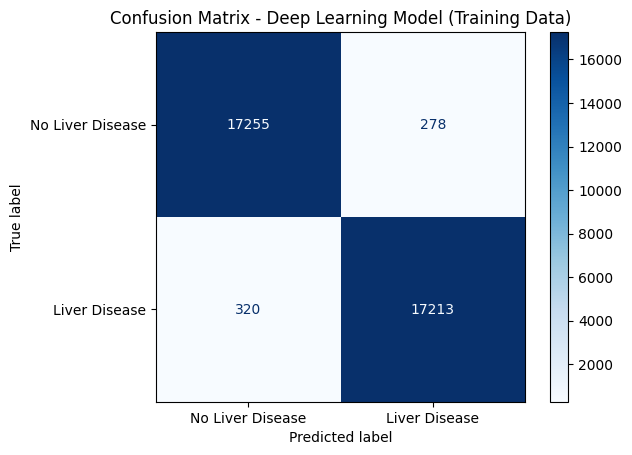

Training stopped at epoch: 117


In [ ]:
# Seeding, same as the first train model
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

#features
X = clean_data.drop('Result', axis=1)  
#target
y = clean_data['Result']              

# Train-test split
X_train, x_test, y_train, x_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

#SMOTE on only the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#target feature (Result) using one hot encoding
y_train_smote = tf.keras.utils.to_categorical(y_train_smote - 1, num_classes=2) 

#Scale the features between 0 and 1
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)

#Building the model
model = Sequential([
    Dense(128, activation='relu'),                                  
    Dropout(0.2),                                                  
    Dense(64, activation='relu'),                                
    Dropout(0.1),                                                  
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(2, activation='sigmoid')                                 
])

optimizer = Adam(learning_rate=0.0005)

#Compile the model
model.compile(optimizer=optimizer, 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',         
    patience=10,                
    restore_best_weights=True   
)

#Store history on the model
history = model.fit(
    X_train_smote, y_train_smote, 
    epochs=1000,                
    batch_size=64,
    validation_split=0.2,     
    callbacks=[early_stopping], 
    verbose=1
)

#saving the model for future use 
hyperparameterized_model = model

#Plotting accuracy and loss
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

#trainign data with SMOTE applied to training data 
y_train_pred = model.predict(X_train_smote)
y_train_pred_classes = y_train_pred.argmax(axis=1) + 1  # Convert predictions to class labels (1 or 2)

#Classiccation and accuracy report
y_train_smote_classes = y_train_smote.argmax(axis=1) + 1
print("Training Accuracy:", accuracy_score(y_train_smote_classes, y_train_pred_classes))
print("Classification Report - Training Data:")
print(classification_report(y_train_smote_classes, y_train_pred_classes))

#Creating a confusion matrix
cm_train = confusion_matrix(y_train_smote_classes, y_train_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=["No Liver Disease", "Liver Disease"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Deep Learning Model (Training Data)")
plt.show()

# Check what epoch training stopped
print(f"Training stopped at epoch: {len(history.history['loss'])}")


Epoch 1/200


c:\Users\diasr\miniconda3\envs\liver\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - accuracy: 0.7138 - loss: 0.5384
Epoch 2/200
182/548 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.7788 - loss: 0.4304

c:\Users\diasr\miniconda3\envs\liver\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.7789 - loss: 0.4276
Epoch 3/200
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.8155 - loss: 0.3711
Epoch 4/200
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.8417 - loss: 0.3260
Epoch 5/200
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.8587 - loss: 0.2997
Epoch 6/200
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.8734 - loss: 0.2685
Epoch 7/200
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.8823 - loss: 0.2465
Epoch 8/200
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.8921 - loss: 0.2323
Epoch 9/200
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.9038 - loss: 0.2173
Epoch 10/200
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.9116 - loss: 0.1965
Epoch 11/200
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.9203 - loss: 0.1830
Epoch 12/200
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.9288 - loss: 0.1731
Epoch 13/200
548/548 ━━━━━━━━━

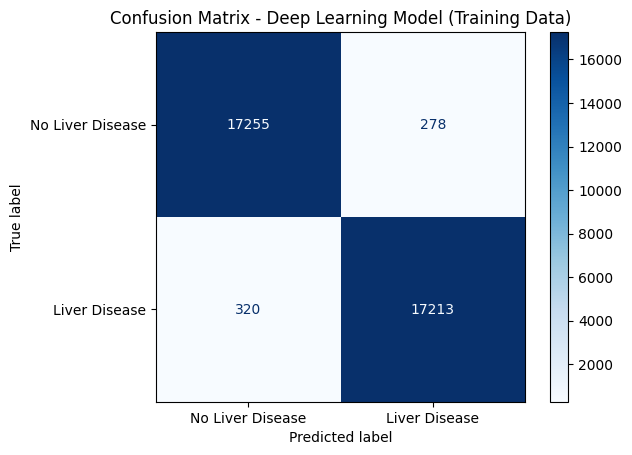

In [ ]:
# Build the final model using the best parameters
final_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_smote.shape[1],)),  # Layer 1: 256 neurons
    Dropout(0.1),                                                         # Dropout rate: 0.1
    Dense(128, activation='relu'),                                        # Layer 2: 128 neurons
    Dropout(0.1),                                                         # Dropout rate: 0.1
    Dense(64, activation='relu'),                                         # Layer 3: 64 neurons
    Dense(2, activation='sigmoid')                                        # Output layer for binary classification
])

# Compile the model with the best learning rate
final_optimizer = Adam(learning_rate=0.005)
final_model.compile(
    optimizer=final_optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the final model using the entire training dataset
history = final_model.fit(
    X_train_smote, y_train_smote, 
    epochs=200,              
    batch_size=64,             
    verbose=1,                 
    callbacks=[early_stopping] 
)

#classificaion and accuracy
y_train_smote_classes = y_train_smote.argmax(axis=1) + 1
print("Training Accuracy:", accuracy_score(y_train_smote_classes, y_train_pred_classes))
print("Classification Report - Training Data:")
print(classification_report(y_train_smote_classes, y_train_pred_classes))

#Creates confusion matrix
cm_train = confusion_matrix(y_train_smote_classes, y_train_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=["No Liver Disease", "Liver Disease"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Deep Learning Model (Training Data)")
plt.show()

### 6.2.3 Running on test
Running the model on the unseen test data

192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step
Test Accuracy: 0.9887603844274312

Classification Report - Test Dataset:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      4384
         1.0       0.97      0.99      0.98      1755

    accuracy                           0.99      6139
   macro avg       0.98      0.99      0.99      6139
weighted avg       0.99      0.99      0.99      6139

Unique values in y_test: [0. 1.]
Unique values in y_test_pred_binary: [0 1]


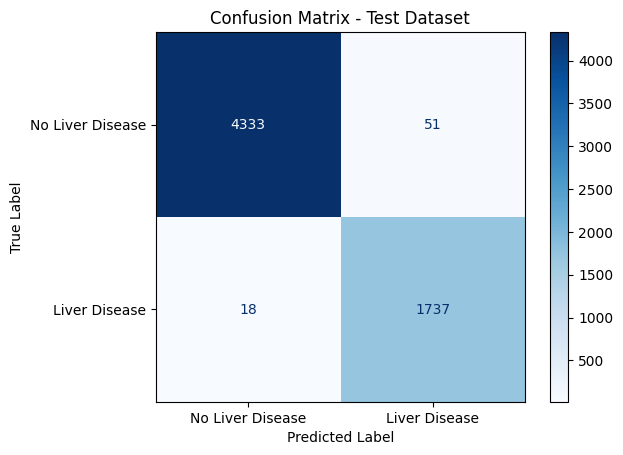

'\nfrom sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Seeding - the nature of training a Deep learning model is random so using a seed keeps the \'enviorment\' the same so you can test if changing a feature actually makes a difference to the model\'s output\ntf.random.set_seed(42)\nnp.random.seed(42)\nrandom.seed(42)\n\n# Use original test labels directly\ny_test_classes_fixed = y_test  # No adjustment needed\n\n# Convert predictions to class labels (binary classification)\ny_test_pred_classes = (y_test_pred > 0.5).astype(int)  # Assuming sigmoid activation for binary output\n\n# Verify unique labels\nprint("Unique labels in y_test_classes_fixed:", np.unique(y_test_classes_fixed))\nprint("Unique labels in y_test_pred_classes:", np.unique(y_test_pred_classes))\n\n# Compute confusion matrix\ncm_test = confusion_matrix(y_test_classes_fixed, y_test_pred_classes)\n\n# Evaluate 

In [ ]:
#Sacler used on test dataset get all values between 0 and 1
X_test_scaled = scaler.transform(X_test)

#test data prediction
y_test_pred = final_model.predict(X_test_scaled)

#Binary prediction probabilities
y_test_pred_binary = (y_test_pred[:, 1] >= 0.5).astype(int)  # Assuming class 1 is the positive class

#Subtracting one from target since issue with mapping (2:1, 1:0)
y_test = y_test - 1

#Accuracy 
test_accuracy = accuracy_score(y_test, y_test_pred_binary)
print("Test Accuracy:", test_accuracy)

#Classification report
print(classification_report(y_test, y_test_pred_binary))

print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_test_pred_binary:", np.unique(y_test_pred_binary))

# Confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred_binary)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["No Liver Disease", "Liver Disease"])
disp_test.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# **7. References**



##
1. https://xgboost.readthedocs.io/en/stable/python/python_api.html
2. https://seaborn.pydata.org/tutorial.html
3. https://www.geeksforgeeks.org/feedforward-neural-network/
4. https://www.w3schools.com/python/python_ml_grid_search.asp
5. https://www.datacamp.com/tutorial/xgboost-in-python
6. https://www.geeksforgeeks.org/what-is-exactly-sklearnpipelinepipeline/
7. https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
8. https://www.kaggle.com/datasets/abhi8923shriv/liver-disease-patient-dataset